In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [5]:
waivers = waivers.loc[waivers['ppsk'] != 'MISSING']
waivers['ppsk'] = waivers.loc[:,'ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
parent_income = cleaned_jacobs[cleaned_jacobs['ppsk'].isin(stem_paths[~stem_paths['income.parent'].isna()]['ppsk'])].merge(stem_paths[['income.parent','ppsk']], on='ppsk')
parent_income = parent_income.merge(waivers[['ppsk','Full Waiver', 'Partial Waiver', 'Partial Exception']], on='ppsk',how='inner')

In [10]:
graphing = parent_income[~parent_income['ppsk'].duplicated()]
graphing[graphing['income.parent'] < 80000].sort_values(by='income.parent', ascending=True).merge(student_majors[['ppsk','major']], on='ppsk').drop_duplicates().groupby('major').count()[['ppsk']].sort_values(by='ppsk')#.head(5)#.plot(kind='barh')

,ppsk
major,
Anthropology,1
Spanish-Latin-Amer Lang & Lit,1
Rhetoric,1
Planetary Science,1
Music,1
...,...
Bioengineering,28
Architecture,44
Cognitive Science,44


Text(0.5, 0, 'Number of Students')

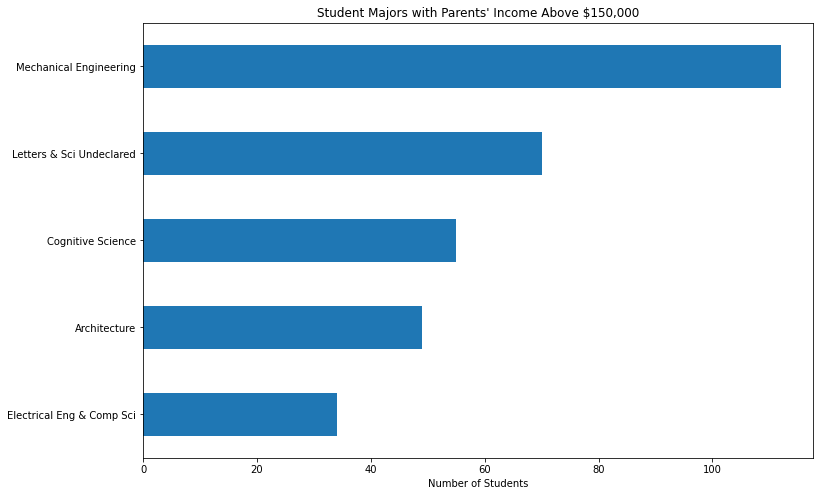

In [11]:
graphing[graphing['income.parent'] < 150000].merge(student_majors[['ppsk','major']], on='ppsk').drop_duplicates().groupby('major').count()['ppsk'].sort_values().tail(5).plot(kind='barh', figsize=(12,8), title='Student Majors with Parents\' Income Above $150,000', xlabel="", ylabel='Count').set_xlabel("Number of Students")

In [12]:
graphing['Under 50,000'] = graphing['income.parent'].map(lambda x: x < 50000)
graphing['50k to 100k'] = graphing['income.parent'].map(lambda x: (x >= 50000) & (x < 100000))
graphing['100k to 250k'] = graphing['income.parent'].map(lambda x: (x >= 100000) & (x < 250000))
graphing['250k+'] = graphing['income.parent'].map(lambda x: x >= 250000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [13]:
data = pd.DataFrame(
    index=['Under $50,000', '$50k to \$100k', '$100k to \$250k', '$250k+'], 
    data = [
        graphing['Under 50,000'].sum(), 
        graphing['50k to 100k'].sum(), 
        graphing['100k to 250k'].sum(), 
        graphing['250k+'].sum()])

In [14]:
data

,0
"Under $50,000",412
$50k to \$100k,231
$100k to \$250k,112
$250k+,16


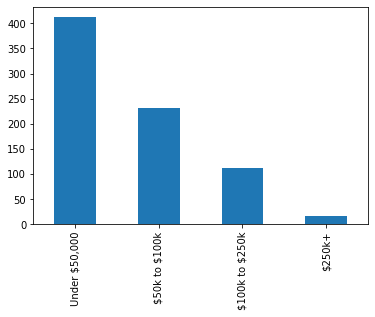

In [15]:
data.plot(kind='bar', stacked=True, legend=False)
#graphing.groupby(['Under 50,000', '50k to 100k', '100k to 250k', '250k+']).count().unstack().fillna(0)['ppsk'].plot()

Text(0.5, 1.0, "Maker Pass Waivers by Student's Parent's Income")

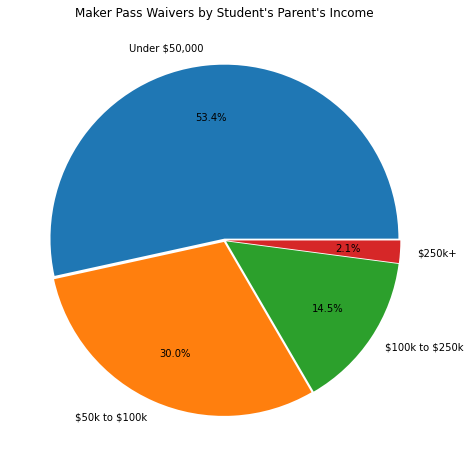

In [16]:
plt.figure(figsize = (10,8))
plt.pie(data[0], labels = data.index, autopct="%.1f%%", explode=[0.01]*4, pctdistance=0.7)
plt.title("Maker Pass Waivers by Student's Parent's Income")